Arushi Nigam

#### Import Statements

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import DistanceMetric

### (b). Pre-Processing and Exploratory data analysis:

#### (i). Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

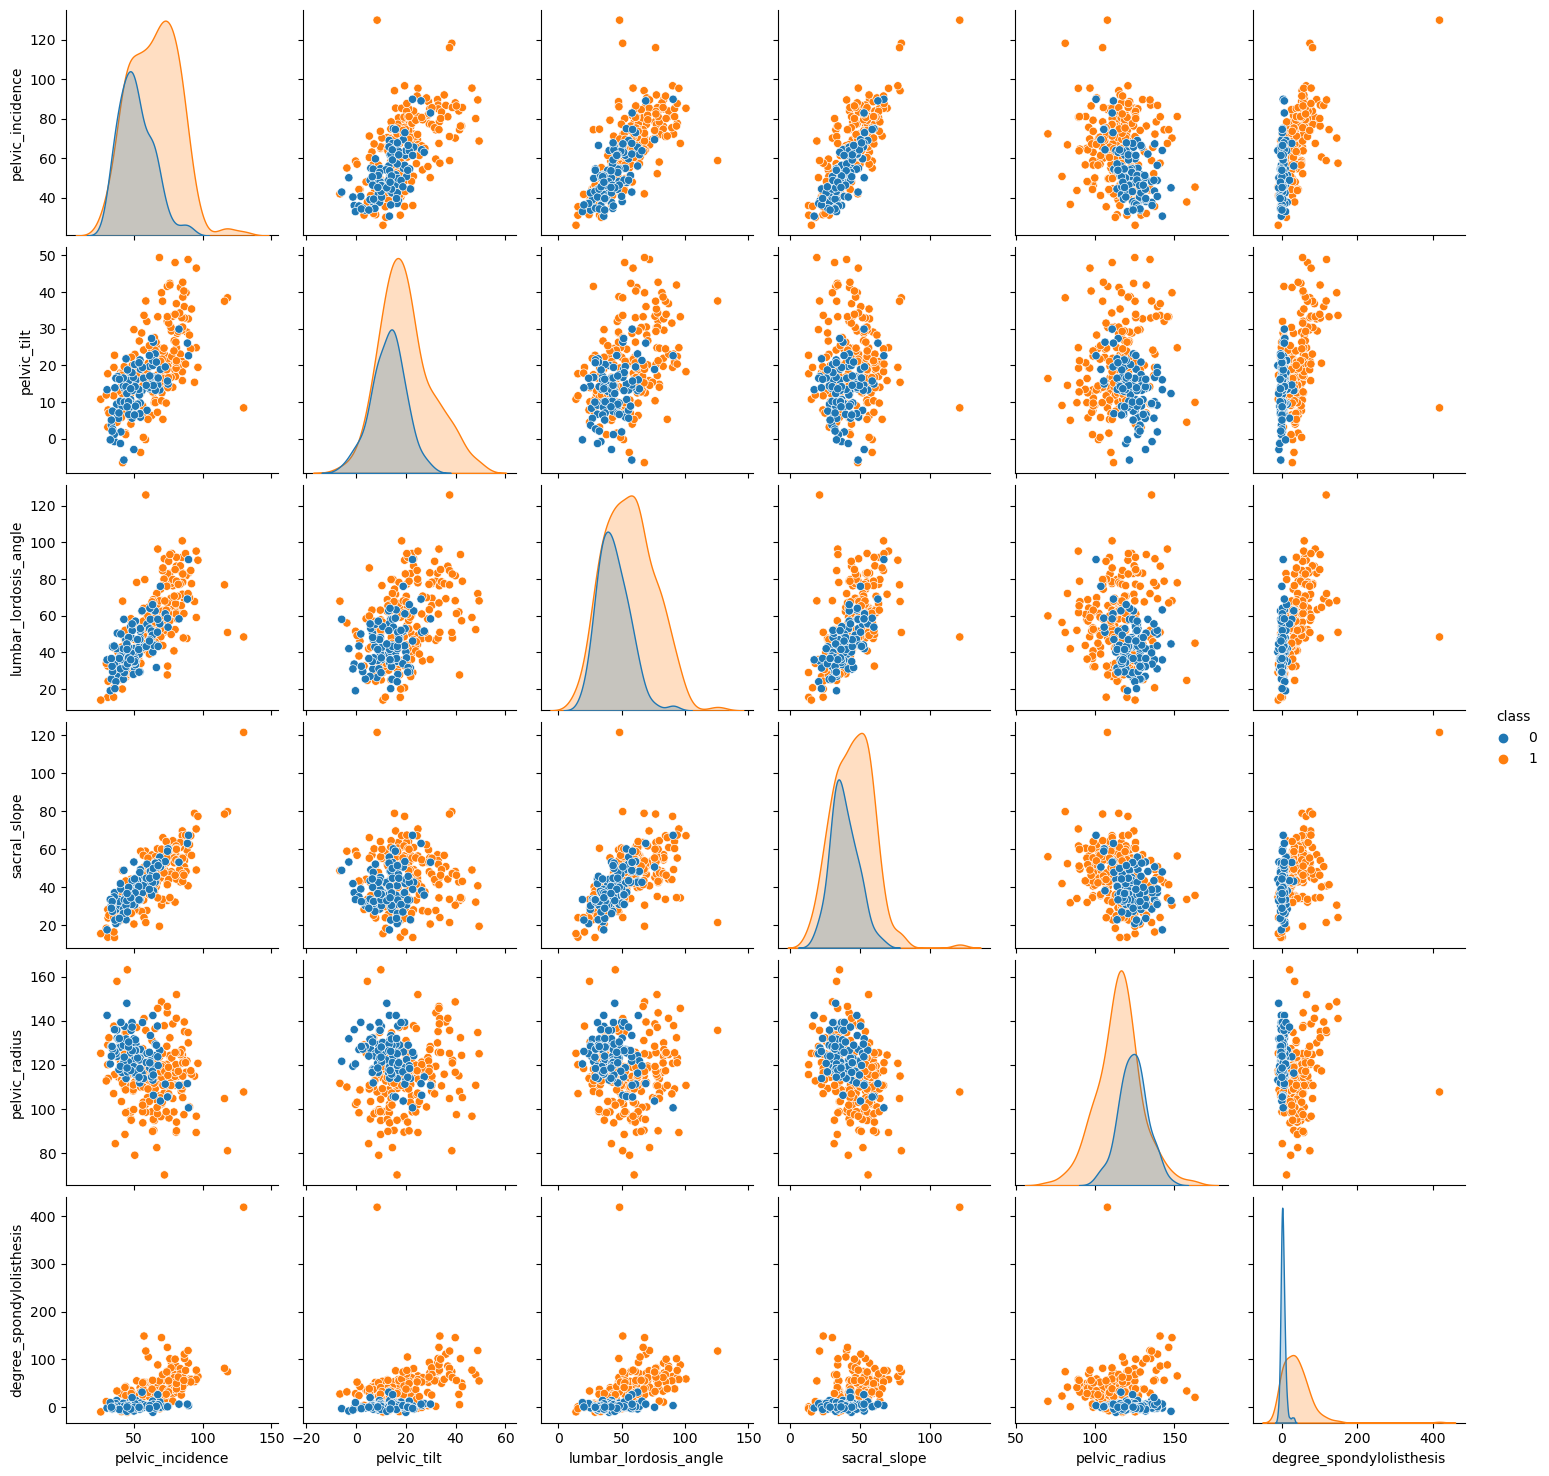

In [2]:
#Load the dataset
dataset = loadarff('../data/vertebral_column_data/column_2C_weka.arff')

#Create a dataframe
df = pd.DataFrame(dataset[0])

#Change the class labels to 0 and 1
df['class'] = df['class'].replace([b'Normal', b'Abnormal'], [0,1])

#Create the scatter plots
sns.pairplot(data=df, hue="class")

#### (ii). Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129)

In [3]:
#Converge the dataframe columns and create groupings according to class
melted = pd.melt(df, id_vars=['class'])

#Create the box plot
sns.boxplot(x=melted['variable'], y=melted['value'], hue=melted['class'], data=melted)

#Size the box plot to show better
sns.set(rc={"figure.figsize":(30, 7)})


#### (iii). Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [4]:
# ---- Pre-processing data ----

#Create two new dataframes separating out Class 0 and 1
ninterimdf = df[(df['class'] == 0)] 
ainterimdf = df[(df['class'] == 1)]

#Grab the first 70 and 140 rows for each Class 0 and 1 respectively
ntop70 = ninterimdf.head(n=70)
atop140 = ainterimdf.head(n=140)

#Grab the remaining rows for each class
nrows = ninterimdf.shape[0] - ntop70.shape[0]
arows = ainterimdf.shape[0] - atop140.shape[0] 

#Create the training set
trainingSet = [ntop70, atop140]
trainingdf = pd.concat(trainingSet)

#Create the test set with the remaining rows
nremain = ninterimdf.tail(nrows)
aremain = ainterimdf.tail(arows)

testSet = [nremain, aremain]
testdf = pd.concat(testSet)

### (c). Classification using KNN on Vertebral Column Data Set

#### (ii). Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . ,7,4,1,} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1 -score when k=k*

Lowest k:  4
Smallest training error:  0.0


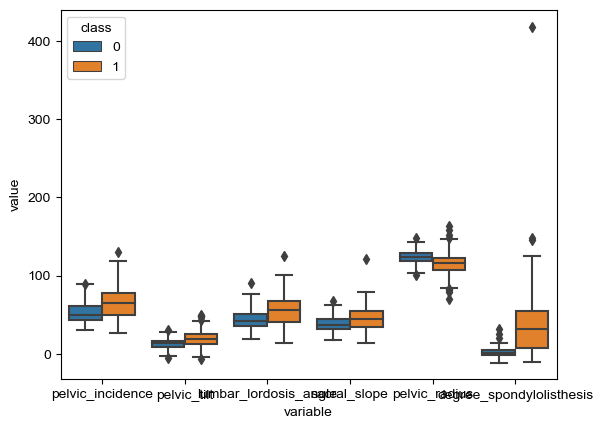

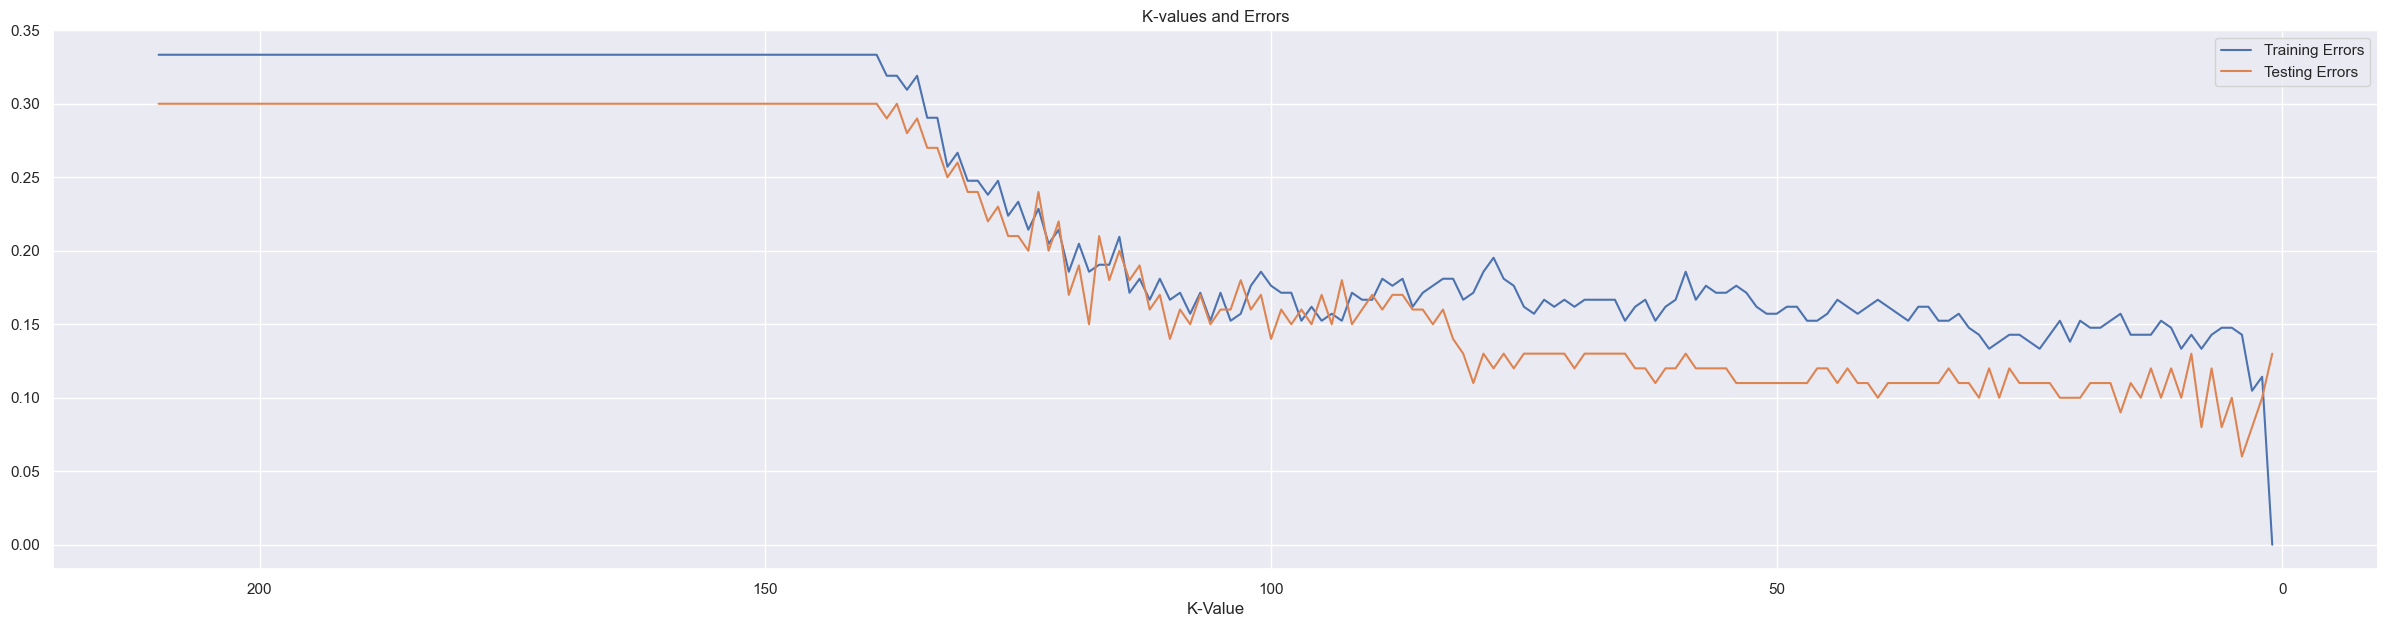

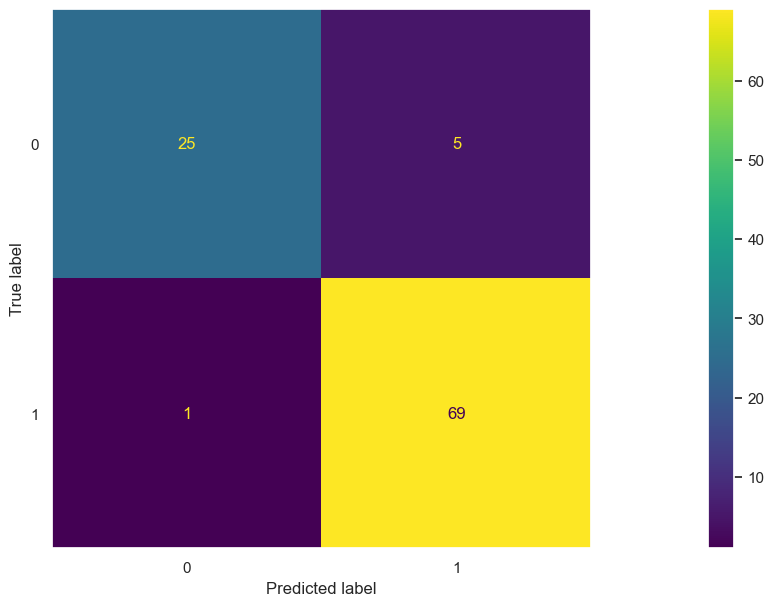

True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334
Precision Score:  0.9324324324324325
F-1 Score:  0.9583333333333333


In [5]:
# ---- Create 2d array of the rows of the dataframe holding the training data ----

# Remove class from the trainging dataframe
classesTrain = np.array(trainingdf['class'])
trainingdfnoc = trainingdf.drop(['class'], axis=1)


training = [];
interim = [];
for index, rows in trainingdfnoc.iterrows():
    interim.append(rows.pelvic_incidence)
    interim.append(rows.pelvic_tilt)
    interim.append(rows.lumbar_lordosis_angle)
    interim.append(rows.sacral_slope)
    interim.append(rows.pelvic_radius)
    interim.append(rows.degree_spondylolisthesis)
    
    training.append(interim)
    interim = [];
    
trainingLabels = np.array(training)

# ---- Create 2d array of the rows of the dataframe holding the testing data ----

# Remove class from the test dataframe
classesTest = np.array(testdf['class'])
testdfnoc = testdf.drop(['class'], axis=1)

test = [];
interim2 = [];
for index, rows in testdfnoc.iterrows():
    interim2.append(rows.pelvic_incidence)
    interim2.append(rows.pelvic_tilt)
    interim2.append(rows.lumbar_lordosis_angle)
    interim2.append(rows.sacral_slope)
    interim2.append(rows.pelvic_radius)
    interim2.append(rows.degree_spondylolisthesis)
    
    test.append(interim2)
    interim2 = [];
    
testLabels = np.array(test)

# ---- Pass in the training data and the classes into the classifier ----

# Lists to hold k values and errors for graphx
kvalues = []
errorstrain = []
errorstest = []

# Running all k values from 210 to 1 into model and generating predictions
for i in range(1, 211):
    kvalues.append(i)
    
    # train model
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(trainingLabels, classesTrain)
    
    # predicting for training data
    y_predict_training = model.predict(trainingLabels)
    errorTrain = 1-(metrics.accuracy_score(classesTrain, y_predict_training))
    errorstrain.append(errorTrain)
    
    #predicting for test data
    y_predict_test = model.predict(testLabels)
    errorTest = 1-(metrics.accuracy_score(classesTest, y_predict_test))
    errorstest.append(errorTest)

# Lowest k
minerrorTest = min(errorstest)
lowestk = kvalues[errorstest.index(minerrorTest)]
print("Lowest k: ", lowestk)
print("Smallest training error: ", min(errorstrain))

# Creating dataframe containing k-values, training errors, and testing errors
errordf = pd.DataFrame(zip(kvalues, errorstrain, errorstest), columns =['K-Value', 'Training Errors', 'Testing Errors'])

# Plotting training and testing errors
errordf.plot(x="K-Value", y=["Training Errors", "Testing Errors"], title="K-values and Errors").invert_xaxis()
plt.show()

# ----- Create confusion matrix and find true positive rate, true negative rate, precision, and F1-score for lowest k ----

# training model at k=4
model2 = KNeighborsClassifier(n_neighbors=lowestk)
model2.fit(trainingLabels, classesTrain)
y4_predict = model2.predict(testLabels)

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classesTest, y4_predict)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

# True Positive
truepositive = metrics.recall_score(classesTest, y4_predict)
print("True Positive Rate: ", truepositive)

# True Negative
truenegative = metrics.recall_score(classesTest, y4_predict, pos_label=0)
print("True Negative Rate: ", truenegative)

# Precision
precisionScore = metrics.precision_score(classesTest, y4_predict)
print("Precision Score: ", precisionScore)

# F-1 Score
f1Score = metrics.f1_score(classesTest, y4_predict)
print("F-1 Score: ", f1Score) 

#### (iii). Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,*3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30, . . . ,210}.

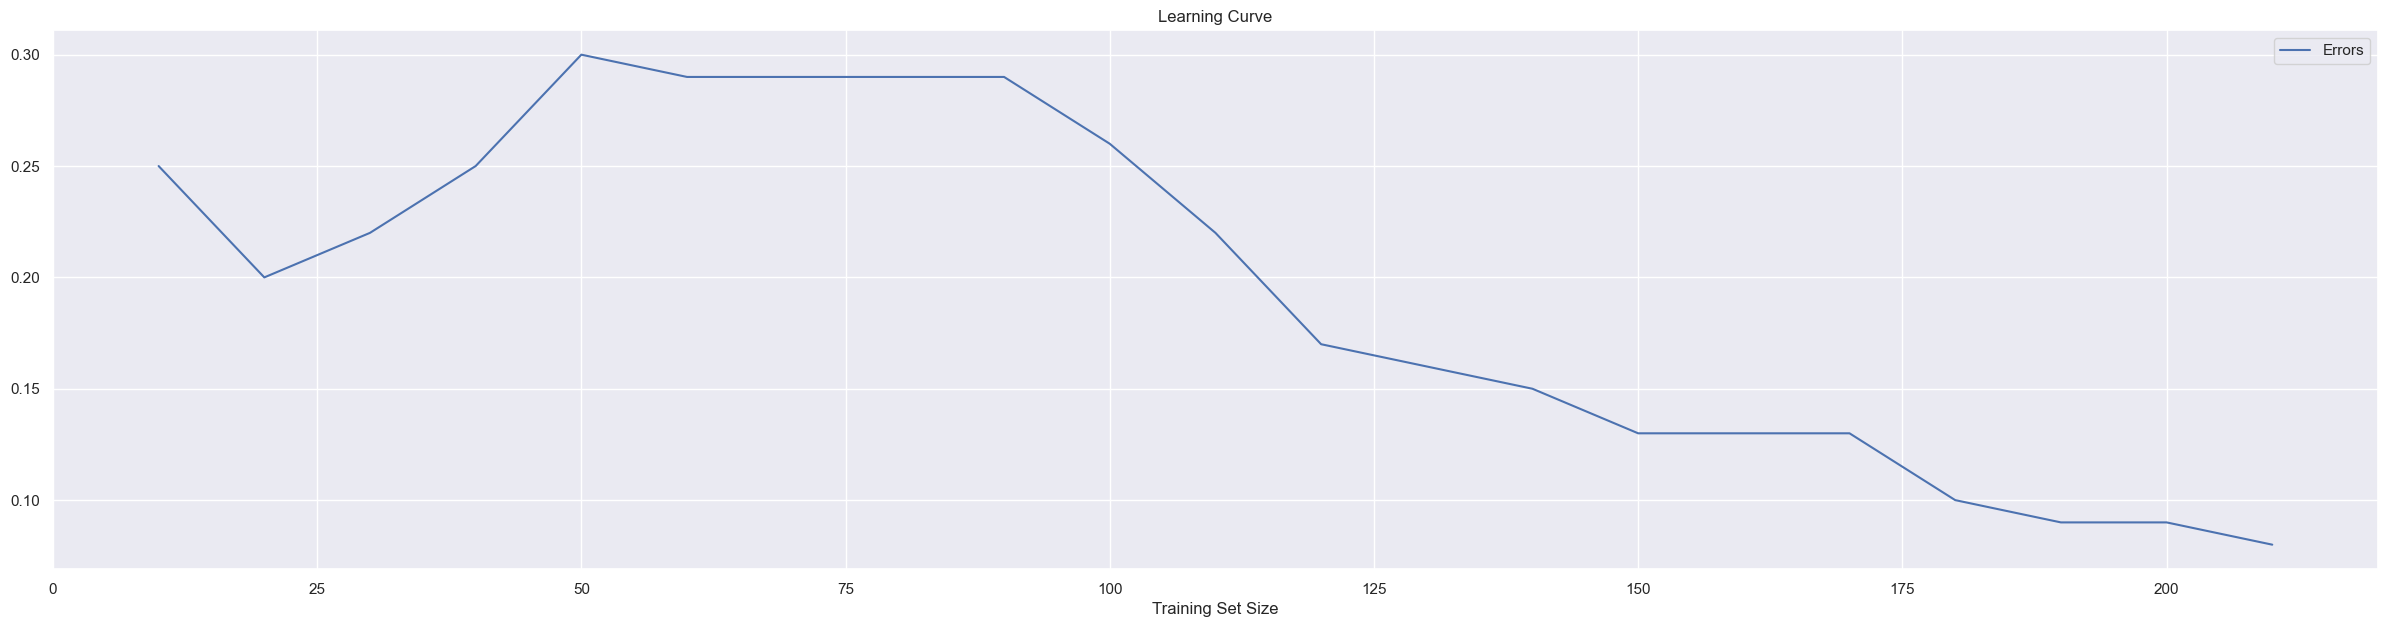

In [6]:
# ---- Create dataframes per class without class label ----
class0 = trainingdf.loc[trainingdf['class'] == 0]
class1 = trainingdf.loc[trainingdf['class'] == 1]
class0classes = np.array(class0['class'])
class1classes = np.array(class1['class'])
class0df = class0.drop(['class'], axis=1)
class1df = class1.drop(['class'], axis=1)

# ---- Create 2d array of the rows of the dataframe holding the class 0 data ----

training0 = [];
interim0 = [];
for index, rows in class0df.iterrows():
    interim0.append(rows.pelvic_incidence)
    interim0.append(rows.pelvic_tilt)
    interim0.append(rows.lumbar_lordosis_angle)
    interim0.append(rows.sacral_slope)
    interim0.append(rows.pelvic_radius)
    interim0.append(rows.degree_spondylolisthesis)
    
    training0.append(interim0)
    interim0 = [];
    
trainingLabels0 = np.array(training0)

# ---- Create 2d array of the rows of the dataframe holding the class 1 data ----

training1 = [];
interim1 = [];
for index, rows in class1df.iterrows():
    interim1.append(rows.pelvic_incidence)
    interim1.append(rows.pelvic_tilt)
    interim1.append(rows.lumbar_lordosis_angle)
    interim1.append(rows.sacral_slope)
    interim1.append(rows.pelvic_radius)
    interim1.append(rows.degree_spondylolisthesis)
    
    training1.append(interim1)
    interim1 = [];
    
trainingLabels1 = np.array(training1)

# ---- Find best test error per N ----
bestErrors = [];
Nvalues = [];
besterror = 1;

for N in range(10, 211, 10):
    
    # number of rows per class
    rows0 = N//3
    rows1 = N-(N//3)
        
    c0rows = trainingLabels0[:rows0]
    c1rows = trainingLabels1[:rows1]
    c0labels = class0classes[:rows0]
    c1labels = class1classes [:rows1]
    
    totalcrows = np.concatenate((c0rows, c1rows))
    totalclabels = np.concatenate((c0labels, c1labels))
    
    # find the best error per N
    for k in range(1, N, 5):

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(totalcrows, totalclabels)

        ypred = model.predict(testLabels)
        error = 1-(metrics.accuracy_score(classesTest, ypred))
 
        if error < besterror:
            besterror = error
        
    # create lists to plot later        
    Nvalues.append(N)
    bestErrors.append(besterror)
    besterror = 1

# ----- Plot the learning curve -----
besterrordf = pd.DataFrame(zip(Nvalues, bestErrors), columns =['Training Set Size', 'Errors'])

# Plotting training set size and best test error
besterrordf.plot(x="Training Set Size", y="Errors", title='Learning Curve')

plt.show()    

### (d). Replace the euclidean metrics with the following metrics and test them. Summarize the test errors (i.e. when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, ..., 196}.

#### (iA). which becomes Manhattan Distance with p = 1.

In [7]:
#---- Manhattan Distance K* calculations ----

# Lists to hold k values and errors for graph
kvaluesman = []
errorstestman = []

# Running all k values from 210 to 1 into model and generating predictions
for i in range(1, 201, 5):
    kvaluesman.append(i)
    
    # train model
    model = KNeighborsClassifier(n_neighbors=i, p=1)
    model.fit(trainingLabels, classesTrain)
    
    #predicting for test data
    ypredman = model.predict(testLabels)
    errorTestman = 1-(metrics.accuracy_score(classesTest, ypredman))
    errorstestman.append(errorTestman)

#### (iB). with log10(p) ∈ {0.1, 0.2, 0.3, ..., 1}. In this case, use the k* you found in for the Manhattan distance in 1d(iA). What is the best log10(p)?

In [8]:
# ---- Log p values for Manhattan distance ----
pvalerrors = [];
pnums = []
logpvals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for m in logpvals:
    pnums.append(math.pow(10,m))

for j in pnums:    
    modelmanp = KNeighborsClassifier(n_neighbors=6, p=j)
    modelmanp.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredpval = modelmanp.predict(testLabels)
    errorTestpval = 1-(metrics.accuracy_score(classesTest, ypredpval))
    pvalerrors.append(errorTestpval)

#### (iC). which becomes Chebyshev Distance with p --> infinity

In [9]:
# ---- Chebyshev Distance ----
kvaluesch = [];
errorstestch = [];

for n in range(1, 201, 5):
    kvaluesch.append(n)
    
    modelch = KNeighborsClassifier(n_neighbors=n, metric='chebyshev')
    modelch.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredch = modelch.predict(testLabels)
    errorTestch = 1-(metrics.accuracy_score(classesTest, ypredch))
    errorstestch.append(errorTestch)

#### d(ii). Mahalanobis Distance

In [10]:
# ----- Mahalanobis Distance ----

kvaluesma = [];
errorstestma = [];

for r in range(1, 201, 5):
    kvaluesma.append(r)
    
    modelma = KNeighborsClassifier(n_neighbors=r, metric='mahalanobis', metric_params={'VI': np.cov(trainingLabels.T)}) #, 'V': np.cov(trainingLabels, rowvar=False)})
    modelma.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredma = modelma.predict(testLabels)
    errorTestma = 1-(metrics.accuracy_score(classesTest, ypredma))
    errorstestma.append(errorTestma)

In [11]:
# ---- Summarized Table ----

# Lowest k
distance = ["Manhattan ", "Log-p    ", "Chebyshev ", "Mahalanobis"];
ks = [];
errorssum = [];

# Manhattan
ks.append(6)
errorssum.append(min(errorstestman))

# Log-P
ks.append(logpvals[pvalerrors.index(min(pvalerrors))])
errorssum.append(min(pvalerrors))

# Chebyshev
ks.append(kvaluesch[errorstestch.index(min(errorstestch))])
errorssum.append(min(errorstestch))
        
# Mahalanobis
ks.append(kvaluesma[errorstestma.index(min(errorstestma))])
errorssum.append(min(errorstestma))
            
errorsumdf = pd.DataFrame(zip(distance, ks, errorssum), columns =['Distance', 'K-Values', 'Best Error'])

print('Distance Type ', '    K-Values ', '    Best Error ')
for i in range(0,4):
    print(distance[i], "         ", ks[i], "      ", errorssum[i])

Distance Type      K-Values      Best Error 
Manhattan            6        0.10999999999999999
Log-p               0.6        0.06000000000000005
Chebyshev            16        0.07999999999999996
Mahalanobis           6        0.07999999999999996


### (e). The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, ..., 196}.

In [12]:
# ---- Euclidean Weighted Distance ----
errorsweigheuc = [];
keuw = [];

for a in range(1, 201, 5):
    keuw.append(a)
    
    modeleu = KNeighborsClassifier(n_neighbors=a, weights='distance', metric='euclidean')
    modeleu.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredeu = modeleu.predict(testLabels)
    errorTesteu = 1-(metrics.accuracy_score(classesTest, ypredeu))
    errorsweigheuc.append(errorTesteu)
    
# ---- Manhattan Weighted Distance ----
errorsweighmanw = [];
kmanw = [];

for s in range(1, 201, 5):
    kmanw.append(s)
    
    modelmanw = KNeighborsClassifier(n_neighbors=s, weights='distance', metric='manhattan')
    modelmanw.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredmanw = modelmanw.predict(testLabels)
    errorTestmanw = 1-(metrics.accuracy_score(classesTest, ypredmanw))
    errorsweighmanw.append(errorTestmanw)

# ---- Chebyshev Weighted Distance ----
errorsweighchw = [];
kchw = [];

for g in range(1, 201, 5):
    kchw.append(g)
    
    modelchw = KNeighborsClassifier(n_neighbors=g, metric='chebyshev', weights='distance')
    modelchw.fit(trainingLabels, classesTrain)
    
    #testing errors
    ypredchw = modelchw.predict(testLabels)
    errorTestchw = 1-(metrics.accuracy_score(classesTest, ypredchw))
    errorsweighchw.append(errorTestchw)

# ---- Create Table ----
kmine = keuw[errorsweigheuc.index(min(errorsweigheuc))]
kminm = kmanw[errorsweighmanw.index(min(errorsweighmanw))]
kminc = kchw[errorsweighchw.index(min(errorsweighchw))]


distanceW = ["Euclidean ", "Manhattan ", "Chebyshev "];
ksw = [];
errorssumw = [];

ksw.append(kmine)
ksw.append(kminm)
ksw.append(kminc)

errorssumw.append(min(errorsweigheuc))
errorssumw.append(min(errorsweighmanw))
errorssumw.append(min(errorsweighchw))

print('Distance Type ', '    K-Values ', '    Best Error ')
for i in range(0,3):
    print(distanceW[i], "         ", ksw[i], "        ", errorssumw[i])

Distance Type      K-Values      Best Error 
Euclidean            6          0.09999999999999998
Manhattan            26          0.09999999999999998
Chebyshev            16          0.10999999999999999


### (f) What is the lowest training error rate you achieved in this homework?

Smallest training error: 0.0

References:

https://stackoverflow.com/questions/46401209/how-to-convert-the-arff-object-loaded-from-a-arff-file-into-a-dataframe-format

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#deleting-rows-using-drop-best-for-small-numbers-of-rows

https://datatofish.com/replace-values-pandas-dataframe/

https://seaborn.pydata.org/examples/grouped_boxplot.html

https://stackoverflow.com/questions/44552489/plotting-multiple-boxplots-in-seaborn

https://thispointer.com/pandas-select-first-or-last-n-rows-in-a-dataframe-using-head-tail/

https://pandas.pydata.org/docs/user_guide/merging.html

https://www.adamsmith.haus/python/answers/how-to-convert-a-pandas-dataframe-into-a-list-of-tuples-in-python

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

https://www.geeksforgeeks.org/create-a-list-from-rows-in-pandas-dataframe/

https://www.geeksforgeeks.org/create-a-list-from-rows-in-pandas-dataframe/

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

https://stackoverflow.com/questions/47775220/how-to-plot-multiple-pandas-columns

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score